# Week 3 Assignment
Linear regression

## Objective of the assignment
Build a linear regression model to predict the log number of shares an article received

### What is Linear Regression?
When we have 2 variables, an independent variable (X) and a dependent variable (Y). A linear regression would do 2 things:

To see how closely related that X and Y variables are. To apply linear regression, we would would get a result between -1 and 1 that gives us an indication of the the strength of correlation between the two variables. 0 means they aren't related. 1 means they are positively correlated (an increase in X means an increase in Y). -1 means negatively correlated (increase in X means a decrease in Y and vice versa).

We can use linear regression for prediction. If we know the rough relationship between X and Y, then we can use this relationship to predict values of Y for a value of X we desire..

In [7]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt 

In [8]:
df = pd.read_csv('data Mashable.csv')
df = df.sort_values(by='shares', ascending=False) #sort the data set to see the biggest target shares first (column z)

df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
15508,15509,http://mashable.com/2013/07/03/low-cost-iphone/,12,688,15,1,4.893895,0,0,0,...,0,0,0,0,0.503345,0.186037,0.100000,-0.300000,843300,5.925982
16736,16737,http://mashable.com/2013/04/15/dove-ad-beauty-...,11,893,0,11,4.586786,0,0,1,...,0,0,0,0,0.450678,0.100533,0.000000,0.000000,690400,5.839101
22572,22573,http://mashable.com/2014/04/09/first-100-gilt-...,13,2591,1,1,4.588962,0,0,0,...,0,0,0,0,0.415273,0.075724,0.535714,0.285714,663600,5.821906
2022,2023,http://mashable.com/2013/11/18/kanye-west-harv...,9,134,0,2,4.082090,0,0,1,...,0,0,0,0,0.556854,0.004040,0.000000,0.000000,652900,5.814847
8128,8129,http://mashable.com/2013/03/02/wealth-inequality/,11,382,11,1,4.777487,0,0,0,...,0,1,0,1,0.340229,0.125005,0.000000,0.000000,617900,5.790918
11257,11258,http://mashable.com/2014/01/14/australia-heatw...,9,192,0,2,4.765625,0,0,1,...,0,0,0,0,0.506254,0.138755,0.454545,0.136364,310800,5.492481
7300,7301,http://mashable.com/2013/03/28/blackberry-1-mi...,10,905,21,0,4.492818,0,0,1,...,0,0,0,0,0.370382,0.121126,0.000000,0.000000,306100,5.485863
19359,19360,http://mashable.com/2013/11/14/ibm-watson-brief/,12,198,14,1,4.954545,0,0,1,...,0,0,0,0,0.577273,-0.063636,0.700000,-0.450000,298400,5.474799
4659,4660,http://mashable.com/2013/10/18/childhood-mashups/,10,390,0,16,5.133333,0,0,0,...,1,0,0,0,0.568687,0.262921,0.000000,0.000000,233400,5.368101
15178,15179,http://mashable.com/2013/02/28/myspace-tom-twi...,11,506,1,0,4.764822,0,0,0,...,0,0,0,0,0.525233,0.145535,0.600000,-0.400000,227300,5.356599


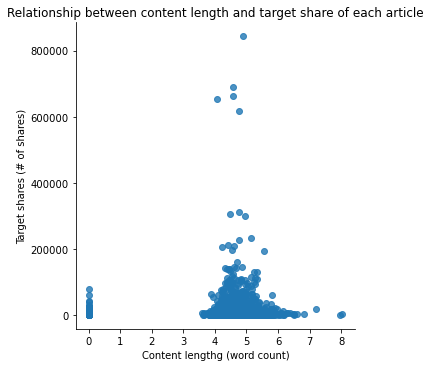

In [21]:
sns.lmplot(x='average_token_length', y='shares', fit_reg=False, data=df) 
plt.xlabel('Content lengthg (word count)')
plt.ylabel('Target shares (# of shares)')
plt.title('Relationship between content length and target share of each article')
plt.show()

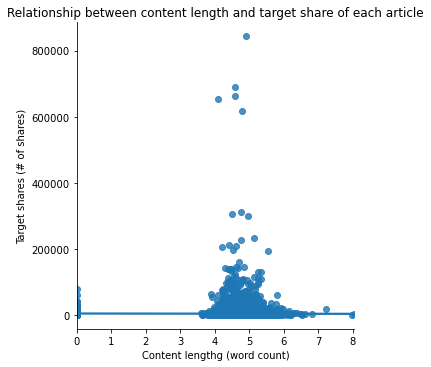

In [18]:
sns.lmplot(x='average_token_length', y='shares', data=df, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.xlabel('Content lengthg (word count)')
plt.ylabel('Target shares (# of shares)')
plt.title('Relationship between content length and target share of each article')
plt.show()

From the graph above "Relationship between content length and target share of each article", we can see that there is almost no correlation between these two variables.

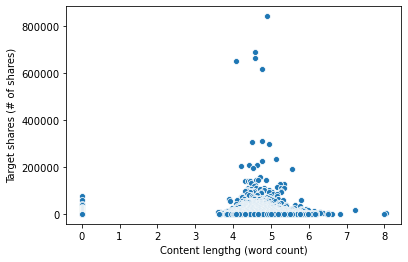

In [34]:
x = df[['average_token_length']] 
y = df['shares'] 
lm = LinearRegression() 
lm.fit(x, y)

df['views_p'] = lm.predict(x) #generate the predictions and add them to the dataframe
df['resid'] = df['shares'] - df['views_p'] #get the residuals by subtracting the prediction from the actual views

sns.scatterplot(x='average_token_length', y='shares',data=df)
plt.xlabel('Content lengthg (word count)')
plt.ylabel('Target shares (# of shares)')
plt.show()

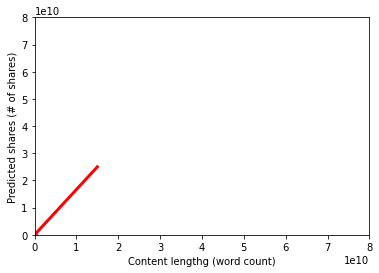

In [35]:
sns.scatterplot(x='average_token_length', y='resid', data=df)
plt.xlim(0, 8e10) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 8e10) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e10], [0, 2.5e10], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Content lengthg (word count)')
plt.ylabel('Predicted shares (# of shares)')
plt.show()

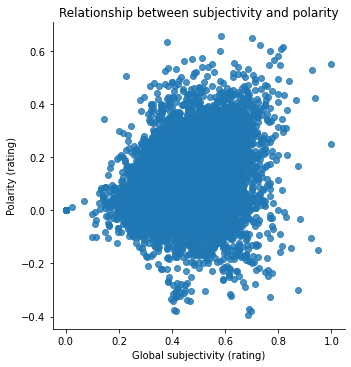

In [22]:
sns.lmplot(x='global_subjectivity', y='global_sentiment_polarity', fit_reg=False, data=df) 
plt.xlabel('Global subjectivity (rating)')
plt.ylabel('Polarity (rating)')
plt.title('Relationship between subjectivity and polarity')
plt.show()

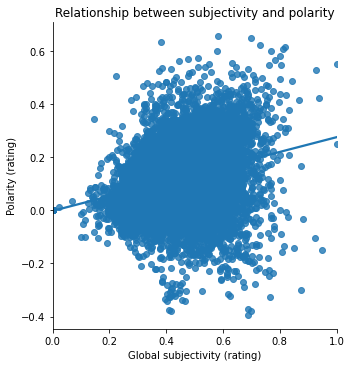

In [19]:
sns.lmplot(x='global_subjectivity', y='global_sentiment_polarity', data=df, ci=False) 
plt.xlabel('Global subjectivity (rating)')
plt.ylabel('Polarity (rating)')
plt.title('Relationship between subjectivity and polarity')
plt.show()

From the graph above "Relationship between subjectivity and polarity", we can see that there is a relatively weak correlation between these two variables.

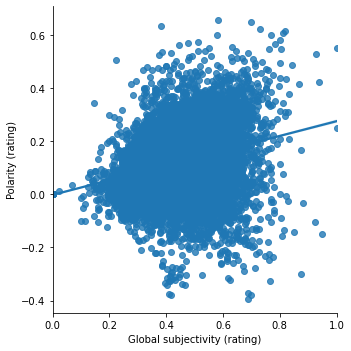

In [38]:
x = df[['global_subjectivity']] 
y = df['global_sentiment_polarity'] 
lm = LinearRegression() 
lm.fit(x, y)

df['views_p'] = lm.predict(x) #generate the predictions and add them to the dataframe
df['resid'] = df['global_sentiment_polarity'] - df['views_p'] #get the residuals by subtracting the prediction from the actual views

sns.lmplot(x='global_subjectivity', y='global_sentiment_polarity', data=df) 
plt.xlabel('Global subjectivity (rating)')
plt.ylabel('Polarity (rating)')
plt.show()

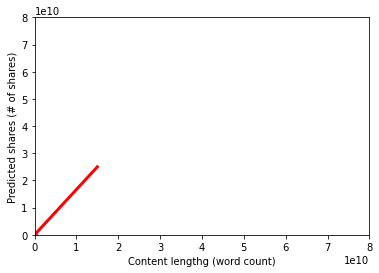

In [39]:
sns.scatterplot(x='global_subjectivity', y='resid', data=df)
plt.xlim(0, 8e10) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 8e10) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e10], [0, 2.5e10], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Content lengthg (word count)')
plt.ylabel('Predicted shares (# of shares)')
plt.show()

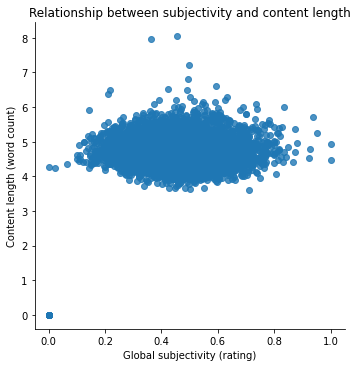

In [13]:
sns.lmplot(x='global_subjectivity', y='average_token_length', fit_reg=False, data=df) 
plt.xlabel('Global subjectivity (rating)')
plt.ylabel('Content length (word count)')
plt.title('Relationship between subjectivity and content length')
plt.show()

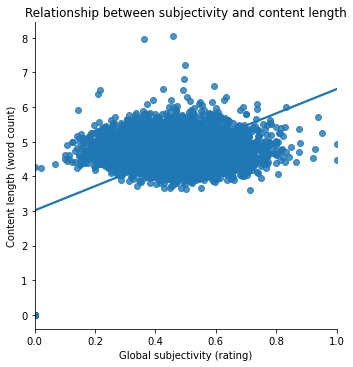

In [20]:
sns.lmplot(x='global_subjectivity', y='average_token_length', data=df, ci=False) 
plt.xlabel('Global subjectivity (rating)')
plt.ylabel('Content length (word count)')
plt.title('Relationship between subjectivity and content length')
plt.show()

From the graph above "Relationship between subjectivity and content length", we can see that there is a relatively weak correlation between these two variables.

Let's fit a linear model to determine the coefficients of the line. We'll do this with the machine learning package `sk-learn`.

In [26]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['global_subjectivity']]
y = df['global_sentiment_polarity']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals. 

The regression line is equal to y = -0.00 + 0.28X


Or, in a pretty Markdown formula (using $ to begin and end a formula):

$y= 45.78 + 416.79x$

Where _y_ is views in millions and _x_ is subscribers in millions.

Now, let's use our model to predict the values for all channels in our dataset:

In [27]:
df['shares_log'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
15508,15509,http://mashable.com/2013/07/03/low-cost-iphone/,12,688,15,1,4.893895,0,0,0,...,0,0,0,0,0.503345,0.186037,0.100000,-0.300000,843300,0.137316
16736,16737,http://mashable.com/2013/04/15/dove-ad-beauty-...,11,893,0,11,4.586786,0,0,1,...,0,0,0,0,0.450678,0.100533,0.000000,0.000000,690400,0.122697
22572,22573,http://mashable.com/2014/04/09/first-100-gilt-...,13,2591,1,1,4.588962,0,0,0,...,0,0,0,0,0.415273,0.075724,0.535714,0.285714,663600,0.112869
2022,2023,http://mashable.com/2013/11/18/kanye-west-harv...,9,134,0,2,4.082090,0,0,1,...,0,0,0,0,0.556854,0.004040,0.000000,0.000000,652900,0.152169
8128,8129,http://mashable.com/2013/03/02/wealth-inequality/,11,382,11,1,4.777487,0,0,0,...,0,1,0,1,0.340229,0.125005,0.000000,0.000000,617900,0.092039
11257,11258,http://mashable.com/2014/01/14/australia-heatw...,9,192,0,2,4.765625,0,0,1,...,0,0,0,0,0.506254,0.138755,0.454545,0.136364,310800,0.138123
7300,7301,http://mashable.com/2013/03/28/blackberry-1-mi...,10,905,21,0,4.492818,0,0,1,...,0,0,0,0,0.370382,0.121126,0.000000,0.000000,306100,0.100409
19359,19360,http://mashable.com/2013/11/14/ibm-watson-brief/,12,198,14,1,4.954545,0,0,1,...,0,0,0,0,0.577273,-0.063636,0.700000,-0.450000,298400,0.157836
4659,4660,http://mashable.com/2013/10/18/childhood-mashups/,10,390,0,16,5.133333,0,0,0,...,1,0,0,0,0.568687,0.262921,0.000000,0.000000,233400,0.155453
15178,15179,http://mashable.com/2013/02/28/myspace-tom-twi...,11,506,1,0,4.764822,0,0,0,...,0,0,0,0,0.525233,0.145535,0.600000,-0.400000,227300,0.143391
